In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Colab path)
df = pd.read_csv('/data/superstore.csv')

df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

df[['Order Date', 'Ship Date']].head()

,Order Date,Ship Date
0,2017-11-08,2017-11-11
1,2017-11-08,2017-11-11
2,2017-06-12,2017-06-16
3,2016-10-11,2016-10-18
4,2016-10-11,2016-10-18


In [ ]:
df['Sales'].describe()

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [ ]:
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()

total_sales, total_orders

(np.float64(2261536.7827000003), 4922)

/tmp/ipython-input-4251310831.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales']


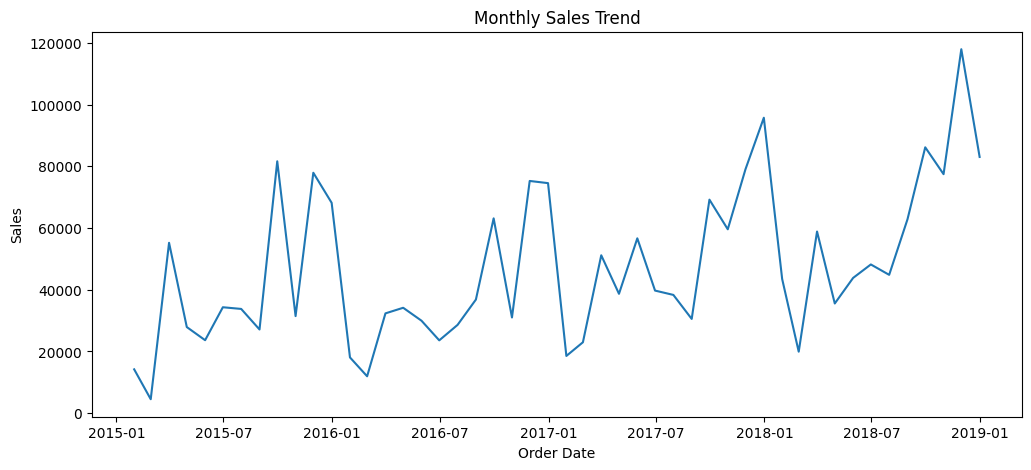

In [ ]:
monthly_sales = (
    df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales']
      .sum()
      .reset_index()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()


In [ ]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales


,Sales
Category,
Technology,827455.8730
Furniture,728658.5757
Office Supplies,705422.3340


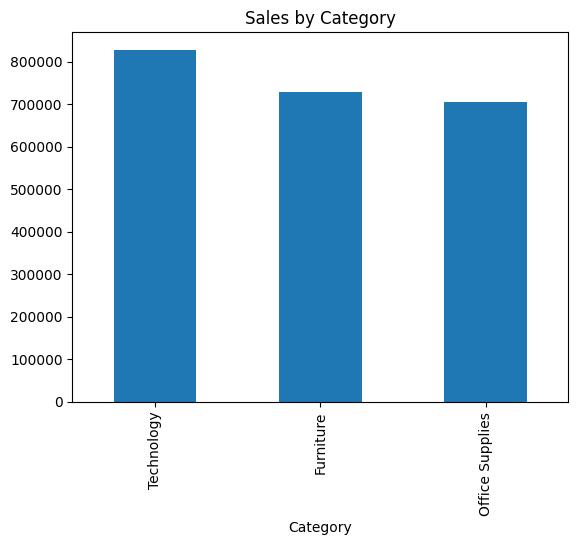

In [ ]:
category_sales.plot(kind='bar', title='Sales by Category')
plt.show()


In [ ]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales


,Sales
Region,
West,710219.6845
East,669518.7260
Central,492646.9132
South,389151.4590
